<a href="https://colab.research.google.com/github/Quark-hadron/Training-on-different-dates-and-dates/blob/main/Extrovert_Introvert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [524]:
! pip install category_encoders
! pip install feature_engine

In [525]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from category_encoders import CountEncoder
from feature_engine.encoding import CountFrequencyEncoder

In [526]:
! gdown --id 1qMiLJFTjgnhhPk-Jn73vMpiVcMuZaiKA
! gdown --id 1kstTH4sYnr_uFpCAMUxWzeH_nD8BQyx2
! gdown --id 1M-jdPCndHO-x6qYCCchzUzMQzOaANcL3

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qMiLJFTjgnhhPk-Jn73vMpiVcMuZaiKA
To: /content/test.csv
100% 195k/195k [00:00<00:00, 22.0MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kstTH4sYnr_uFpCAMUxWzeH_nD8BQyx2
To: /content/train.csv
100% 760k/760k [00:00<00:00, 53.1MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.

In [527]:
train = pd.read_csv('/content/train.csv')
test  = pd.read_csv('/content/test.csv')
sub = pd.read_csv('/content/sample_submission.csv')

In [528]:
train_id = train['id']
train.drop('id', axis=1, inplace=True)

In [529]:
print('train size:  test size:\n')
((train.shape), (test.shape))

train size:  test size:



((18524, 8), (6175, 8))

Время проведения в одном состоянии     ------ Time_spent_Alone

Страх сцены                            ------ Stage_fear

Посещение общественных мероприятий     ------ Social_event_attendance

Выход на улицу                         ------ Going_outside

Истощение после общения                ------ Drained_after_socializing

Размер круга друзей                    ------ Friends_circle_size

Частота постов                         ------ Post_frequency

Личность                               ------ Personality


In [530]:
train.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [531]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           17334 non-null  float64
 1   Stage_fear                 16631 non-null  object 
 2   Social_event_attendance    17344 non-null  float64
 3   Going_outside              17058 non-null  float64
 4   Drained_after_socializing  17375 non-null  object 
 5   Friends_circle_size        17470 non-null  float64
 6   Post_frequency             17260 non-null  float64
 7   Personality                18524 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


In [532]:
train.isna().sum()

,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0


The signs don't contain many gaps, so we won't delete them because of the gaps.

In [533]:
print('Percent non-null in Dataframe\n')

percent_mean_train_nan = [round(col, 1) for col in train.isna().mean() * 100]
df_percent_with_target = pd.Series(data=percent_mean_train_nan, index=train.columns)
df_percent = df_percent_with_target.drop(index=df_percent_with_target.index[-1])
df_percent

Percent non-null in Dataframe



,0
Time_spent_Alone,6.4
Stage_fear,10.2
Social_event_attendance,6.4
Going_outside,7.9
Drained_after_socializing,6.2
Friends_circle_size,5.7
Post_frequency,6.8


A good sign we notice here is the dependence: the higher the frequency of posts, the more likely the type is an extrovert, and vice versa if it is an introvert.

In [534]:
post_pers = pd.crosstab(columns=train['Post_frequency'], index=[train['Personality']])
post_pers

Post_frequency,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Personality,,,,,,,,,,,
Extrovert,59,69,113,1760,1632,1740,1719,1775,1696,1699,660
Introvert,1213,1145,1178,498,56,48,48,52,38,45,17


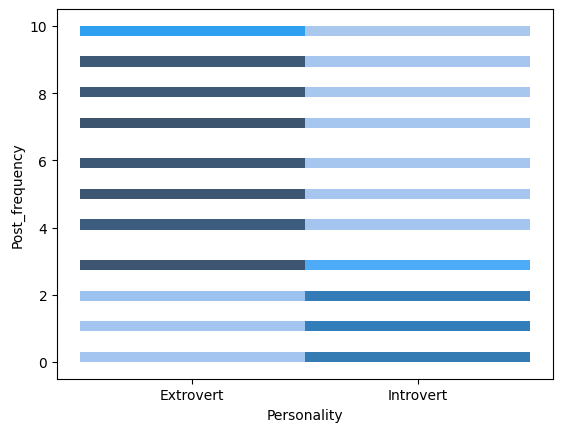

In [535]:
sns.histplot(data=train, x='Personality', y='Post_frequency').hist;

Another cool feature with some dependence of a person on the number of friends

In [536]:
friends_pers = pd.crosstab(columns=train['Friends_circle_size'], index=[train['Personality']])
friends_pers

Friends_circle_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
Personality,,,,,,,,,,,,,,,,
Extrovert,28,37,42,105,577,913,1098,1092,1250,1039,1219,1223,1286,1023,1161,906
Introvert,439,716,728,761,740,756,48,32,31,22,48,30,31,25,27,37


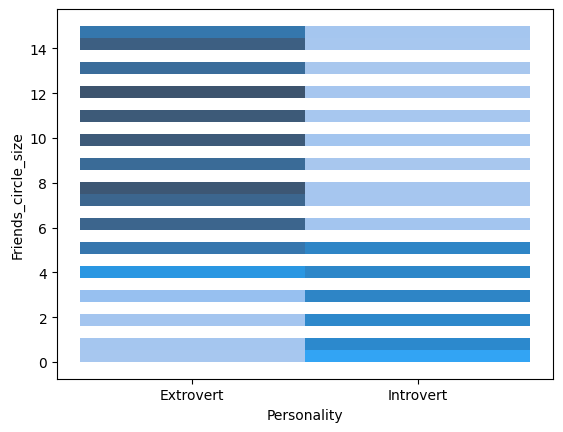

In [537]:
sns.histplot(data=train, x='Personality', y='Friends_circle_size').hist;

In [538]:
train['Drained_after_socializing'] = train['Drained_after_socializing'].map({'Yes':1, 'No':0})
train['Stage_fear'] = train['Stage_fear'].map({'Yes':1, 'No':0})
train['Personality'] = train['Personality'].map({'Introvert':1, 'Extrovert':0})

In [539]:
train['Drained_after_socializing'].value_counts(dropna=False)

,count
Drained_after_socializing,
0.0,13313
1.0,4062
NaN,1149


In [540]:
X = train.drop('Personality', axis=1)

In [541]:
knni = KNNImputer(n_neighbors=5)
x_knni = knni.fit_transform(X)
df = pd.DataFrame(data=x_knni, columns=X.columns)

In [545]:
df = df.astype('int64')

In [547]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0,0,6,4,0,15,5
1,1,0,7,3,0,10,8
2,6,1,1,0,1,3,0
3,3,0,7,3,0,11,5
4,1,0,4,4,0,13,6
